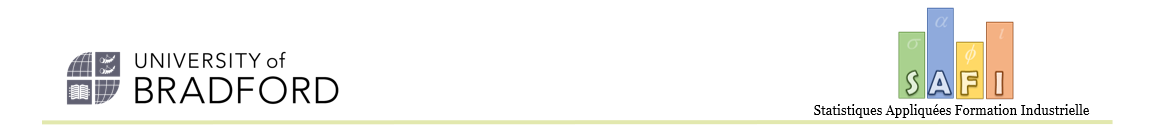

<font size=16>**Tutorial 3: Model Selection**

# About this session

## Objectives

* Additional interpretation of multiple regression output.

## Engineering Scenario

Tutorial 03 is a continuation of Tutorial 02 so the first three tasks are the same

Now we have fitted the regression model, we would like to carry out residual analysis and check if the regression coefficients are significant and have a real effect.

# Tutorial Tasks

Fit a regression model and carry out residual analysis.
1. Read the tutorial data into a Pandas dataframe.

2. Code the factors

3. Fit a 1st order response surface using the coded factors and evaluate model coefficients

4. Investigate model reduction

5. Generate and analyse residual plots.

---

# Packages and special code

In this section we install any packages that are not standard Colab then we import the packages that we need need into the Python namespace.



## Uploading files to Colab

1. Click on the "Files" icon on the left hand side of the Colab window (it is a folder symbol). This will take you to the "Files" panel.
2. Drag and drop the files `M05BU.py` and `M05Data.xlsx` onto the Files panel.
3. Click on the "Contents" icon (to the left of the word "Files") to go to the Table of Contents panel.
4. Use the `ls` command to get a folder listing (useful for copying and pasting file names) by running the next cell.

In [ ]:
ls

## Import the courseware

Run the next cell to import the custom courseware. We have used the alias, `bu`, as shorthand for "Bradford Utilities"

In [ ]:
import M05BU as bu

## Package imports

Run the next cell to import the necessary packages into the Python namespace.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Task 1

## 1.1 Read the course data

Run the following cell and you will see the first three rows of the dataframe just to confirm that it has worked.

In [ ]:
filename = 'M05Data.xlsx'
sheetname = 'Sintering data'
df = pd.read_excel(filename, sheet_name=sheetname)
df.head(3)

# Task 2: Set up the regression analysis

## 2.1 Create a Series containing the output variable

We are interested in modelling response (y) as a function of the other data so we choose the y as the output.

In [ ]:
Y = df['y'].copy(deep=True)
Y.head(1)

## 2.2 Create a DataFrame containing the model matrix in uncoded units


You can change the model by editing the code.

```python
X_uncoded = pd.DataFrame(
    columns = ['Intercept'] +
    ['x1', 'x2', 'x3']
)
```

So if you want to reduce the terms in the model you can replace it with, for example.

```python
X_uncoded = pd.DataFrame(
    columns = ['Intercept'] +
    ['x1', 'x2']
)
```

In [ ]:
X_uncoded = pd.DataFrame(
    columns = ['Intercept'] +
    ['x1', 'x2', 'x3']
)
for col in X_uncoded.columns[1:]:
    X_uncoded[col] = df[col].copy(deep=True)
X_uncoded['Intercept'] = 1.0
X_uncoded

## 2.3 Create a DataFrame containing the model matrix in coded units

Coding the model matrix is straightforward using the formula:

$x_{coded} = \frac{2x - (x_{max} + x_{min})}{x_{max} - x_{min}}$

The right hand side of which can be turned into Python as follows:

`(2*s - (s.max() + s.min())) / (s.max() - s.min())`

where s is a pandas series.

In [ ]:
X_coded = X_uncoded.copy(deep=True)
for col in X_coded.columns[1:]:
  s = X_coded[col]
  X_coded[col] = (2*s - (s.max() + s.min())) / (s.max() - s.min())
X_coded

# Task 3: Analyse the data

This is a straightforward use of the seaborn scatterplot tool.

## 3.1 Analyse the data using coded units

We again use the the `OLS` (ordinary least squares) object that we imported from `statsmodels.api`.

In [ ]:
model = OLS(Y, X_coded).fit()

## 3.2 Use the courseware to format the results

The statsmodels summary method doesn't produce the output in the form that we need so we have provided some courseware that fromats the model output in a more friendly manner.

In [ ]:
Results = bu.RegResults(model)
bu.printMarkdown('## Coded Units')
bu.printMarkdown('### Regression Results')
Results

Changing the alpha parameter in the next cell will change the confidence limits that are displayed for the coefficients.

In [ ]:
Coefficients = bu.RegCoefficients(model, X_coded, alpha=0.2)
bu.printMarkdown('##Coded Units')
bu.printMarkdown('###Model Coefficients')
display(Coefficients)

# Task 4: Investigate model reduction

**Apply t-test to the regression coefficients**

Now we have fitted the model, and analysed the residuals. Next step is to simplify the model by eliminating the terms which are not significant. This is done by examinig the p-values against a threshold criteria.

- The conventional threshold is is 0.05 or 5%.

- For this case, we will use a relaxed threshold value of 0.15 or 15%. This means we will remove the terms which have p-values higher than 0.15.


## 4.1 Removing the x3 term

We begin by producing a reduced model matrix as follows.

In [ ]:
X_reduced = X_coded.drop('x3', axis=1)
X_reduced.head(1)

We can now produce the regression results for the reduced model.

In [ ]:
model = OLS(Y, X_reduced).fit()
Results = bu.RegResults(model)
bu.printMarkdown('## Coded Units')
bu.printMarkdown('### Regression Results')
display(Results)
Coefficients = bu.RegCoefficients(model, X_reduced, alpha=0.2)
bu.printMarkdown('###Model Coefficients')
display(Coefficients)

# Task 5: Generate residual plots

## 5.1 Add diagnostic output to the DataFrame

In the following cell we add residual diagnostic output to the regression data in the dataframe. We will use this dataframe to generate residual plots.

In [ ]:
df['fits'] = model.fittedvalues                                                                  # fitted values
res = OLSInfluence(model)                                                                        # residual summary data
raw_resid = pd.DataFrame(res.resid,columns=['raw_resid'])                                        # raw residuals
df_resid = pd.concat([df, raw_resid, res.summary_frame()['student_resid']], axis=1)              # creating dataframe
df_resid.head(3)

## 5.2 Generate Residual Plots

In [ ]:
bu.resid_fourpack(df_resid['student_resid'],df_resid['fits'])

The plot, **Deleted Residuals Vs Fits**, is 'healthy' (no trends or patterns) other than the empty space on right corners but this could be due to small sample size.

- Deleted residuals are within the range of -3 to +3, indicating there is no evidence of outliers and the ‘constant $\sigma$’ assumption appears to be reasonable because the amplitude is roughly constant across the plot.

- The ‘constant $\sigma$’ assumption is important in regression analysis because if the random variation in y is very different at different levels of the predictors (x’s) we should not use the ordinary least squares method to fit the regression equation.